# Demographics Summary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
from scipy import stats
from sklearn.metrics import r2_score

ON_COLAB = False
FILEROOT = "H:/NewUsers/everyday/Documents/CSTA/2022Data/"
#if (ON_COLAB):
#    # LOGIC TO RUN ON GOOGLE COLAB
#    from google.colab import drive
#    drive.mount("/drive", force_remount=True)
#    FILEROOT = "/drive/My Drive/Colab Notebooks/"

print (FILEROOT + 'StateDemographics2022a.csv')

df = pd.read_csv(FILEROOT + 'StateDemographics2022a.csv')
#df = pd.read_csv("https://raw.githubusercontent.com/lgtanimoto/CSed2021Data/main/StatePoliciesWithDemographic2.csv")

H:/NewUsers/everyday/Documents/CSTA/2022Data/StateDemographics2022a.csv


In [2]:
print (df.dtypes)

State                  object
StateName              object
NumOfHS               float64
NumHSWithCS           float64
PctHSwFCS             float64
TotalStudents         float64
NumStudentsinHSwCS    float64
PctStudentsHSwCS      float64
Total_Black           float64
Total_HLLL            float64
Total_Native          float64
Total_HPI             float64
Total_White           float64
Total_Asian           float64
Total_TwoPlus         float64
InCSHS_Black          float64
InCSHS_HLLL           float64
InCSHS_Native         float64
InCSHS_HPI            float64
InCSHS_White          float64
InCSHS_Asian          float64
InCSHS_TwoPlus        float64
InFCS_Male            float64
InFCS_Female          float64
InFCS_Other           float64
InFCS_Black           float64
InFCS_HLLL            float64
InFCS_Native          float64
InFCS_HPI             float64
InFCS_White           float64
InFCS_Asian           float64
InFCS_TwoPlus         float64
InFCS_Total           float64
AP_Male   

In [3]:
# Policies one/zero and count number of policies implemented
#policies = ['P1_StatePlan','P2_Standards', 'P3_Funding', 'P4_Certification', 'P5_PreserviceIncentives', 'P6_StateCSposition', 'P7_RequireHStoOffer',
#'P8_CountGradReq', 'P9_HigherEdAdmission']
#policiesB = ["B" + p for p in policies]

#def makeBinary(yesno):
#    if (yesno.upper() == 'YES'):
#        return 1
#    else:
#        return 0
    
#for i in range(len(policies)):
#    df[policiesB[i]] = df[policies[i]].apply(lambda x:makeBinary(x))
    
#df['NumPolicies']=df[policiesB].sum(axis=1)


In [4]:
# Calculate per state percentages for InFCS, AP

df.loc[df['InFCS_Total'].notnull(),'Pct_InFCS'] = df['InFCS_Total'] / df['TotalStudents']  # Percentage of students in foundational Computer Science -note only 36 have data
df['Pct_InAP'] = df['AP_Total'] / df['TotalStudents'] # Percentage of students in AP

# Could not get FemPlus to work consistenly so just used female
#df.loc[df['InFCS_Total'].notnull(),'InFCS_FemPlus'] = df['InFCS_Female'] + df['InFCS_Other'].apply(lambda x: x if x != None else 0)
#df['AP_FemPlus'] = df['AP_Female'] + df['AP_Gender'].apply(lambda x: x if x != None else 0) 

# Calculate percentages per state for various subgroups
# Note that in nationwide male/female ratio and in each is closer to 51%/49% than 50/50 and it is assumed that this ratio holds for the number of male/female in HS with FCS 
df.loc[df['InFCS_Total'].notnull(),'Pct_InFCS_Female'] = df['InFCS_Female'] /  df['InFCS_Total']
df['Pct_InAP_Female'] = df['AP_Female'] / df['AP_Total']

# Male 2/26/22
df.loc[df['InFCS_Total'].notnull(),'Pct_InFCS_Male'] = df['InFCS_Male'] /  df['InFCS_Total']
df['Pct_InAP_Male'] = df['AP_Male'] / df['AP_Total']

# Black percentages
df['Pct_Students_Black'] = df['Total_Black'] / df['TotalStudents']
df['Pct_HSwFCS_Black'] = df['InCSHS_Black'] /df['NumStudentsinHSwCS']
df.loc[df['InFCS_Total'].notnull(),'Pct_InFCS_Black'] = df['InFCS_Black'] / df['InFCS_Total']
df['Pct_InAP_Black'] = df['AP_Black'] / df['AP_Total']

#HLLL percentages 2/26/22
df['Pct_Students_HLLL'] = df['Total_HLLL'] / df['TotalStudents']
df['Pct_HSwFCS_HLLL'] = df['InCSHS_HLLL'] / df['NumStudentsinHSwCS']
df.loc[df['InFCS_Total'].notnull(),'Pct_InFCS_HLLL'] = df['InFCS_HLLL'] / df['InFCS_Total']
df['Pct_InAP_HLLL'] = df['AP_HLLL'] / df['AP_Total']

#White percentages 2/26/22
df['Pct_Students_White'] = df['Total_White'] / df['TotalStudents']
df['Pct_HSwFCS_White'] = df['InCSHS_White'] / df['NumStudentsinHSwCS']
df.loc[df['InFCS_Total'].notnull(),'Pct_InFCS_White'] = df['InFCS_White'] / df['InFCS_Total']
df['Pct_InAP_White'] = df['AP_White'] / df['AP_Total']



In [5]:
# CAPE Pyramid ratios
df['CP_StHSCS_HSCS_All'] = df['PctStudentsHSwCS'] / df['PctHSwFCS']
df.loc[df['InFCS_Total'].notnull(),'CP_StFCS_StHSCS_All'] = df['InFCS_Total'] / df['NumStudentsinHSwCS']
df.loc[df['InFCS_Total'].notnull(),'CP_StAP_StFCS_All'] = df['AP_Total'] / df['InFCS_Total']
df['CP_StAP_StHSCS_All'] = df['AP_Total'] / df['NumStudentsinHSwCS']

# CAPE Pyramid ratios for subgroups
df.loc[df['InFCS_Total'].notnull(),'CP_StFCS_StHSCS_FemaleEst'] = df['InFCS_Female'] / (.49 * df['NumStudentsinHSwCS'])
df.loc[df['InFCS_Total'].notnull(),'CP_StAP_StFCS_Female'] = df['AP_Female'] / df['InFCS_Female']
df['CP_StAP_StHSCS_FemaleEst'] = df['AP_Female'] / (.49 * df['NumStudentsinHSwCS'])

df.loc[df['InFCS_Total'].notnull(),'CP_StFCS_StHSCS_MaleEst'] = df['InFCS_Male'] / (.51 * df['NumStudentsinHSwCS'])
df.loc[df['InFCS_Total'].notnull(),'CP_StAP_StFCS_Male'] = df['AP_Male'] / df['InFCS_Male']
df['CP_StAP_StHSCS_MaleEst'] = df['AP_Male'] / (.51 * df['NumStudentsinHSwCS'])

df['CP_StHSCS_HSCS_Black'] = df['InCSHS_Black'] / df['Total_Black']
df.loc[df['InFCS_Total'].notnull(),'CP_StFCS_StHSCS_Black'] = df['InFCS_Black'] / df['InCSHS_Black']
df.loc[df['InFCS_Total'].notnull(),'CP_StAP_StFCS_Black'] = df['AP_Black'] / df['InFCS_Black']
df['CP_StAP_StHSCS_Black'] = df['AP_Black'] / df['InCSHS_Black']

df['CP_StHSCS_HSCS_HLLL'] = df['InCSHS_HLLL'] / df['Total_HLLL']
df.loc[df['InFCS_Total'].notnull(),'CP_StFCS_StHSCS_HLLL'] = df['InFCS_HLLL'] / df['InCSHS_HLLL']
df.loc[df['InFCS_Total'].notnull(),'CP_StAP_StFCS_HLLL'] = df['AP_HLLL'] / df['InFCS_HLLL']
df['CP_StAP_StHSCS_HLLL'] = df['AP_HLLL'] / df['InCSHS_HLLL']

df['CP_StHSCS_HSCS_White'] = df['InCSHS_White'] / df['Total_White']
df.loc[df['InFCS_Total'].notnull(),'CP_StFCS_StHSCS_White'] = df['InFCS_White'] / df['InCSHS_White']
df.loc[df['InFCS_Total'].notnull(),'CP_StAP_StFCS_White'] = df['AP_White'] / df['InFCS_White']
df['CP_StAP_StHSCS_White'] = df['AP_White'] / df['InCSHS_White']

# ID has 0% for black students in FCS but non 0% for black students for AP so causes errors.   Set AP/FCS ratio to 1
df.loc[df['InFCS_Black']==0,'CP_StAP_StFCS_Black'] = 1.0

In [6]:
sum_columns=['NumOfHS','NumHSWithCS','TotalStudents','NumStudentsinHSwCS','InFCS_Total','AP_Total',
             'InFCS_Female', 'AP_Female', 'InFCS_Male', 'AP_Male', 
             'Total_Black','InCSHS_Black', 'InFCS_Black','AP_Black',         
             'Total_HLLL','InCSHS_HLLL', 'InFCS_HLLL','AP_HLLL',
             'Total_White','InCSHS_White', 'InFCS_White','AP_White']
mean_columns=['PctHSwFCS','PctStudentsHSwCS','Pct_InFCS','Pct_InAP',
              'CP_StHSCS_HSCS_All','CP_StFCS_StHSCS_All','CP_StAP_StFCS_All','CP_StAP_StHSCS_All',
              'Pct_InFCS_Female','Pct_InAP_Female', 'CP_StAP_StFCS_Female', 'CP_StFCS_StHSCS_FemaleEst','CP_StAP_StHSCS_FemaleEst',
              'Pct_InFCS_Male','Pct_InAP_Male', 'CP_StAP_StFCS_Male', 'CP_StFCS_StHSCS_MaleEst','CP_StAP_StHSCS_MaleEst',           
              'Pct_Students_Black','Pct_HSwFCS_Black','Pct_InFCS_Black','Pct_InAP_Black',
              'CP_StHSCS_HSCS_Black','CP_StFCS_StHSCS_Black','CP_StAP_StFCS_Black','CP_StAP_StHSCS_Black',
              'Pct_Students_HLLL','Pct_HSwFCS_HLLL','Pct_InFCS_HLLL','Pct_InAP_HLLL',
              'CP_StHSCS_HSCS_HLLL','CP_StFCS_StHSCS_HLLL','CP_StAP_StFCS_HLLL','CP_StAP_StHSCS_HLLL',
              'Pct_Students_White','Pct_HSwFCS_White','Pct_InFCS_White','Pct_InAP_White',
              'CP_StHSCS_HSCS_White','CP_StFCS_StHSCS_White','CP_StAP_StFCS_White','CP_StAP_StHSCS_White']

df_sum = df[sum_columns].agg('sum')
df_sum_fcs = df.loc[df['InFCS_Total'].notnull(),sum_columns].agg('sum')
df_mean = df[mean_columns].agg('mean')
df_stdev = df[mean_columns].agg(np.std)


In [7]:
print (df_sum)
print (df_sum_fcs)
print (df_mean)
print (df_stdev)


NumOfHS                  26160.0
NumHSWithCS              13883.0
TotalStudents         17292062.0
NumStudentsinHSwCS    12936013.0
InFCS_Total             625608.0
AP_Total                180921.0
InFCS_Female            197336.0
AP_Female                55334.0
InFCS_Male              428090.0
AP_Male                 125118.0
Total_Black            2545677.0
InCSHS_Black           1839752.0
InFCS_Black             103245.0
AP_Black                 11426.0
Total_HLLL             4697516.0
InCSHS_HLLL            3488754.0
InFCS_HLLL              126331.0
AP_HLLL                  29839.0
Total_White            8217480.0
InCSHS_White           6454174.0
InFCS_White             305856.0
AP_White                 77213.0
dtype: float64
NumOfHS                  16116.0
NumHSWithCS               9239.0
TotalStudents         11196936.0
NumStudentsinHSwCS     8582350.0
InFCS_Total             625608.0
AP_Total                114727.0
InFCS_Female            197336.0
AP_Female                354

In [8]:
data_natmean = {'PctHSwFCS': df_sum['NumHSWithCS'] / df_sum['NumOfHS'],
             'PctStudentsHSwCS': df_sum['NumStudentsinHSwCS'] / df_sum['TotalStudents'],
             'Pct_InFCS': df_sum_fcs['InFCS_Total'] / df_sum_fcs['TotalStudents'],
             'Pct_InAP': df_sum['AP_Total'] / df_sum['TotalStudents'],
             'Pct_InFCS_Female': df_sum_fcs['InFCS_Female'] / df_sum_fcs['InFCS_Total'],
             'Pct_InAP_Female': df_sum['AP_Female'] / df_sum['AP_Total'],
             'Pct_InFCS_Male': df_sum_fcs['InFCS_Male'] / df_sum_fcs['InFCS_Total'],
             'Pct_InAP_Male': df_sum['AP_Male'] / df_sum['AP_Total'],
             'Pct_Students_Black': df_sum['Total_Black'] / df_sum['TotalStudents'],
             'Pct_HSwFCS_Black': df_sum['InCSHS_Black'] / df_sum['NumStudentsinHSwCS'],
             'Pct_InFCS_Black': df_sum_fcs['InFCS_Black'] / df_sum_fcs['InFCS_Total'],
             'Pct_InAP_Black': df_sum['AP_Black'] / df_sum['AP_Total'],
             'Pct_Students_HLLL': df_sum['Total_HLLL'] / df_sum['TotalStudents'],
             'Pct_HSwFCS_HLLL': df_sum['InCSHS_HLLL'] / df_sum['NumStudentsinHSwCS'],
             'Pct_InFCS_HLLL': df_sum_fcs['InFCS_HLLL'] / df_sum_fcs['InFCS_Total'],
             'Pct_InAP_HLLL': df_sum['AP_HLLL'] / df_sum['AP_Total'],
             'Pct_Students_White': df_sum['Total_White'] / df_sum['TotalStudents'],
             'Pct_HSwFCS_White': df_sum['InCSHS_White'] / df_sum['NumStudentsinHSwCS'],
             'Pct_InFCS_White': df_sum_fcs['InFCS_White'] / df_sum_fcs['InFCS_Total'],
             'Pct_InAP_White': df_sum['AP_White'] / df_sum['AP_Total']}

# print (data_natmean)
df_natmean = pd.DataFrame(data_natmean, index=[0])



In [9]:
#Estimate male/female ratio for all students in all states as 51/49

df_natmean['CP_StHSCS_HSCS_All'] = (df_sum['NumStudentsinHSwCS'] / df_sum['TotalStudents']) / (df_sum['NumHSWithCS'] / df_sum['NumOfHS'])
df_natmean['CP_StFCS_StHSCS_All'] = df_sum_fcs['InFCS_Total'] / df_sum_fcs['NumStudentsinHSwCS']   
df_natmean['CP_StAP_StFCS_All'] = df_sum_fcs['AP_Total'] / df_sum_fcs['InFCS_Total']   
df_natmean['CP_StAP_StHSCS_All'] = df_sum['AP_Total'] / df_sum['NumStudentsinHSwCS']   

df_natmean['CP_StFCS_StHSCS_FemaleEst'] = df_sum_fcs['InFCS_Female'] / ((.49) * df_sum_fcs['NumStudentsinHSwCS'])   
df_natmean['CP_StAP_StFCS_Female'] = df_sum_fcs['AP_Female'] / df_sum_fcs['InFCS_Female']   
df_natmean['CP_StAP_StHSCS_FemaleEst'] = df_sum['AP_Female'] / ((.49) * df_sum['NumStudentsinHSwCS'])

df_natmean['CP_StFCS_StHSCS_MaleEst'] = df_sum_fcs['InFCS_Male'] / ((.51) * df_sum_fcs['NumStudentsinHSwCS'])   
df_natmean['CP_StAP_StFCS_Male'] = df_sum_fcs['AP_Male'] / df_sum_fcs['InFCS_Male']   
df_natmean['CP_StAP_StHSCS_MaleEst'] = df_sum['AP_Male'] / ((.51) * df_sum['NumStudentsinHSwCS'])

df_natmean['CP_StHSCS_HSCS_Black'] = df_sum['InCSHS_Black'] / df_sum['Total_Black']
df_natmean['CP_StFCS_StHSCS_Black'] = df_sum_fcs['InFCS_Black'] / df_sum_fcs['InCSHS_Black']   
df_natmean['CP_StAP_StFCS_Black'] = df_sum_fcs['AP_Black'] / df_sum_fcs['InFCS_Black']   
df_natmean['CP_StAP_StHSCS_Black'] = df_sum['AP_Black'] / df_sum['InCSHS_Black']   

df_natmean['CP_StHSCS_HSCS_HLLL'] = df_sum['InCSHS_HLLL'] / df_sum['Total_HLLL']
df_natmean['CP_StFCS_StHSCS_HLLL'] = df_sum_fcs['InFCS_HLLL'] / df_sum_fcs['InCSHS_HLLL']   
df_natmean['CP_StAP_StFCS_HLLL'] = df_sum_fcs['AP_HLLL'] / df_sum_fcs['InFCS_HLLL']   
df_natmean['CP_StAP_StHSCS_HLLL'] = df_sum['AP_HLLL'] / df_sum['InCSHS_HLLL']   

df_natmean['CP_StHSCS_HSCS_White'] = df_sum['InCSHS_White'] / df_sum['Total_White']
df_natmean['CP_StFCS_StHSCS_White'] = df_sum_fcs['InFCS_White'] / df_sum_fcs['InCSHS_White']   
df_natmean['CP_StAP_StFCS_White'] = df_sum_fcs['AP_White'] / df_sum_fcs['InFCS_White']   
df_natmean['CP_StAP_StHSCS_White'] = df_sum['AP_White'] / df_sum['InCSHS_White']   



In [10]:
print(df_natmean)


   PctHSwFCS  PctStudentsHSwCS  Pct_InFCS  Pct_InAP  Pct_InFCS_Female  \
0   0.530696           0.74809   0.055873  0.010463          0.315431   

   Pct_InAP_Female  Pct_InFCS_Male  Pct_InAP_Male  Pct_Students_Black  \
0         0.305846        0.684278       0.691562            0.147217   

   Pct_HSwFCS_Black  ...  CP_StAP_StFCS_Black  CP_StAP_StHSCS_Black  \
0          0.142219  ...             0.085195              0.006211   

   CP_StHSCS_HSCS_HLLL  CP_StFCS_StHSCS_HLLL  CP_StAP_StFCS_HLLL  \
0             0.742681              0.057618            0.151341   

   CP_StAP_StHSCS_HLLL  CP_StHSCS_HSCS_White  CP_StFCS_StHSCS_White  \
0             0.008553               0.78542               0.071141   

   CP_StAP_StFCS_White  CP_StAP_StHSCS_White  
0             0.165189              0.011963  

[1 rows x 42 columns]


In [11]:
#RS (relative strength for M/W)
df.loc[df['InFCS_Total'].notnull(),'RS_FemaleMaleEst_CP_StFCS_StHSCS'] = df['CP_StFCS_StHSCS_FemaleEst'] / df['CP_StFCS_StHSCS_MaleEst']
df_natmean['RS_MaleFemaleEst_CP_StFCS_StHSCS'] = df_natmean['CP_StFCS_StHSCS_FemaleEst'] / df_natmean['CP_StFCS_StHSCS_MaleEst']
df.loc[df['InFCS_Total'].notnull(),'RS_FemaleMale_CP_StAP_StFCS'] = df['CP_StAP_StFCS_Female'] / df['CP_StAP_StFCS_Male']
df_natmean['RS_FemaleMale_CP_StAP_StFCS'] = df_natmean['CP_StAP_StFCS_Female'] / df_natmean['CP_StAP_StFCS_Male']
df['RS_FemaleMaleEst_CP_StAP_StHSCS'] = df['CP_StAP_StHSCS_FemaleEst'] / df['CP_StAP_StHSCS_MaleEst']
df_natmean['RS_FemaleMaleEst_CP_StAP_StHSCS'] = df_natmean['CP_StAP_StHSCS_FemaleEst'] / df_natmean['CP_StAP_StHSCS_MaleEst']

df['RS_BlackWhite_CP_StHSCS_HSCS'] = df['CP_StHSCS_HSCS_Black'] / df['CP_StHSCS_HSCS_White']
df_natmean['RS_BlackWhite_CP_StHSCS_HSCS'] = df_natmean['CP_StHSCS_HSCS_Black'] / df_natmean['CP_StHSCS_HSCS_White']
df.loc[df['InFCS_Total'].notnull(),'RS_BlackWhite_CP_StFCS_StHSCS'] = df['CP_StFCS_StHSCS_Black'] / df['CP_StFCS_StHSCS_White']
df_natmean['RS_BlackWhite_CP_StFCS_StHSCS'] = df_natmean['CP_StFCS_StHSCS_Black'] / df_natmean['CP_StFCS_StHSCS_White']
df.loc[df['InFCS_Total'].notnull(),'RS_BlackWhite_CP_StAP_StFCS'] = df['CP_StAP_StFCS_Black'] / df['CP_StAP_StFCS_White']
df_natmean['RS_BlackWhite_CP_StAP_StFCS'] = df_natmean['CP_StAP_StFCS_Black'] / df_natmean['CP_StAP_StFCS_White']
df['RS_BlackWhite_CP_StAP_StHSCS'] = df['CP_StAP_StHSCS_Black'] / df['CP_StAP_StHSCS_White']
df_natmean['RS_BlackWhite_CP_StAP_StHSCS'] = df_natmean['CP_StAP_StHSCS_Black'] / df_natmean['CP_StAP_StHSCS_White']
                                                      
df['RS_HLLLWhite_CP_StHSCS_HSCS'] = df['CP_StHSCS_HSCS_HLLL'] / df['CP_StHSCS_HSCS_White']
df_natmean['RS_HLLLWhite_CP_StHSCS_HSCS'] = df_natmean['CP_StHSCS_HSCS_HLLL'] / df_natmean['CP_StHSCS_HSCS_White']
df.loc[df['InFCS_Total'].notnull(),'RS_HLLLWhite_CP_StFCS_StHSCS'] = df['CP_StFCS_StHSCS_HLLL'] / df['CP_StFCS_StHSCS_White']
df_natmean['RS_HLLLWhite_CP_StFCS_StHSCS'] = df_natmean['CP_StFCS_StHSCS_HLLL'] / df_natmean['CP_StFCS_StHSCS_White']
df.loc[df['InFCS_Total'].notnull(),'RS_HLLLWhite_CP_StAP_StFCS'] = df['CP_StAP_StFCS_HLLL'] / df['CP_StAP_StFCS_White']
df_natmean['RS_HLLLWhite_CP_StAP_StFCS'] = df_natmean['CP_StAP_StFCS_HLLL'] / df_natmean['CP_StAP_StFCS_White']
df['RS_HLLLWhite_CP_StAP_StHSCS'] = df['CP_StAP_StHSCS_HLLL'] / df['CP_StAP_StHSCS_White']
df_natmean['RS_HLLLWhite_CP_StAP_StHSCS'] = df_natmean['CP_StAP_StHSCS_HLLL'] / df_natmean['CP_StAP_StHSCS_White']


In [12]:
RS_columns = ['RS_FemaleMaleEst_CP_StFCS_StHSCS','RS_FemaleMale_CP_StAP_StFCS', 'RS_FemaleMaleEst_CP_StAP_StHSCS',
             'RS_BlackWhite_CP_StHSCS_HSCS', 'RS_BlackWhite_CP_StFCS_StHSCS','RS_BlackWhite_CP_StAP_StFCS', 'RS_BlackWhite_CP_StAP_StHSCS',
             'RS_HLLLWhite_CP_StHSCS_HSCS', 'RS_HLLLWhite_CP_StFCS_StHSCS','RS_HLLLWhite_CP_StAP_StFCS', 'RS_HLLLWhite_CP_StAP_StHSCS']

df_mean_rs = df[RS_columns].agg('mean')
df_stdev_rs = df[RS_columns].agg(np.std)

print (df_mean_rs)
print (df_stdev_rs)
    

RS_FemaleMaleEst_CP_StFCS_StHSCS    0.441828
RS_FemaleMale_CP_StAP_StFCS         1.011639
RS_FemaleMaleEst_CP_StAP_StHSCS     0.410401
RS_BlackWhite_CP_StHSCS_HSCS        0.968896
RS_BlackWhite_CP_StFCS_StHSCS       0.872720
RS_BlackWhite_CP_StAP_StFCS         0.592066
RS_BlackWhite_CP_StAP_StHSCS        0.564131
RS_HLLLWhite_CP_StHSCS_HSCS         0.977614
RS_HLLLWhite_CP_StFCS_StHSCS        0.879204
RS_HLLLWhite_CP_StAP_StFCS          0.877280
RS_HLLLWhite_CP_StAP_StHSCS         0.717135
dtype: float64
RS_FemaleMaleEst_CP_StFCS_StHSCS    0.174447
RS_FemaleMale_CP_StAP_StFCS         0.251737
RS_FemaleMaleEst_CP_StAP_StHSCS     0.105598
RS_BlackWhite_CP_StHSCS_HSCS        0.130189
RS_BlackWhite_CP_StFCS_StHSCS       0.265455
RS_BlackWhite_CP_StAP_StFCS         0.346184
RS_BlackWhite_CP_StAP_StHSCS        0.622816
RS_HLLLWhite_CP_StHSCS_HSCS         0.087357
RS_HLLLWhite_CP_StFCS_StHSCS        0.183778
RS_HLLLWhite_CP_StAP_StFCS          0.843225
RS_HLLLWhite_CP_StAP_StHSCS         0.48

In [13]:
def zscore_calc(col_list):
    for col in col_list:
       df.loc[df[col].notnull(),"ZScore_" + col] = stats.zscore(df.loc[df[col].notnull(), col]) 


zscore_calc(mean_columns)
zscore_calc(RS_columns)

In [14]:
df.to_csv(FILEROOT + "df_all_state_metrics.csv", header=True)
df_sum.to_csv(FILEROOT + "df_sum.csv", header=True)
df_sum_fcs.to_csv(FILEROOT + "df_sum_fcs.csv", header=True)
df_mean.to_csv(FILEROOT + "df_mean.csv", header=True)
df_natmean.to_csv(FILEROOT + "df_natmean.csv", header=True)
df_stdev.to_csv(FILEROOT + "df_stdev.csv", header=True)
df_mean_rs.to_csv(FILEROOT + "df_mean_rs.csv", header=True)
df_stdev_rs.to_csv(FILEROOT + "df_stdev_rs.csv", header=True)



df_fcs = df.loc[df['InFCS_Total'].notnull()]   # to limit StFCS related metrics to states that provide data


In [15]:
def drawBasicHistogram(x_value, x_label, y_label, h_title, nat_avg):
    plt.figure(figsize=(8,8))
    ax = plt.axes()
    plt.hist(x=x_value * 100, bins=10)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(h_title,fontsize=16, fontweight='bold')
    plt.text(0.4,0.9, "National Avg: " + str(round(nat_avg * 100,2)) + "%", transform=ax.transAxes,fontsize=12, fontweight='bold')
    plt.show()
    
def displayStatePerformance(collist, outfile, useFCS):
    if (useFCS):
        dfsort = df_fcs[collist].copy()
    else: 
        dfsort = df[collist].copy()
        
    dfsort = dfsort.sort_values(collist[2],ascending=False)
    dfsort[collist[2]] = (dfsort[collist[2]] * 100).map('{:,.2f}'.format)
    dfsort[collist[3]] = dfsort[collist[3]].map('{:,.2f}'.format)
    dfsort.to_csv(FILEROOT + outfile)
    print (dfsort)
    
    
    
    

# Success Metrics

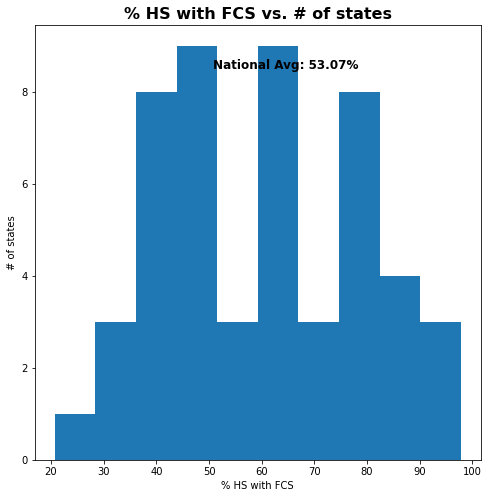

               StateName  TotalStudents PctHSwFCS ZScore_PctHSwFCS
20              Maryland       276026.0     97.79             2.07
40        South Carolina       251268.0     92.90             1.80
2               Arkansas       179064.0     91.80             1.74
39          Rhode Island        44524.0     85.71             1.41
15               Indiana       365052.0     85.47             1.40
1                Alabama       271109.0     85.30             1.39
33                Nevada       165574.0     83.01             1.26
30         New Hampshire        54900.0     82.11             1.21
49         West Virginia        80954.0     78.26             1.00
19         Massachusetts       327732.0     77.63             0.97
6            Connecticut       169269.0     77.29             0.95
38          Pennsylvania       649650.0     76.99             0.94
11                Hawaii        60893.0     76.92             0.93
46               Vermont        26141.0     76.36             

In [16]:
#Percentage of High Schools with FCS
drawBasicHistogram(df['PctHSwFCS'],"% HS with FCS","# of states", "% HS with FCS vs. # of states", float(df_natmean['PctHSwFCS']))
displayStatePerformance(['StateName','TotalStudents','PctHSwFCS','ZScore_PctHSwFCS'],"PctHSwFCS.csv", False)


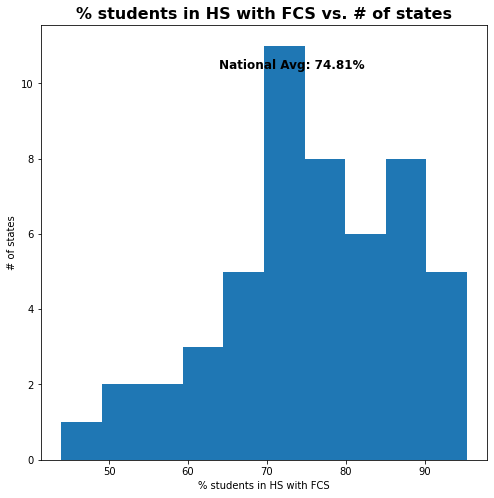

               StateName  TotalStudents PctStudentsHSwCS  \
39          Rhode Island        44524.0            95.35   
30         New Hampshire        54900.0            94.83   
40        South Carolina       251268.0            94.37   
20              Maryland       276026.0            94.26   
33                Nevada       165574.0            92.97   
19         Massachusetts       327732.0            89.52   
6            Connecticut       169269.0            88.83   
1                Alabama       271109.0            86.97   
31            New Jersey       456376.0            86.29   
49         West Virginia        80954.0            86.14   
2               Arkansas       179064.0            85.84   
44                  Utah       300951.0            85.59   
45              Virginia       405826.0            85.55   
47            Washington       377376.0            84.86   
11                Hawaii        60893.0            84.83   
48             Wisconsin       284064.0 

In [17]:
# % of students in HS with FCS
drawBasicHistogram(df['PctStudentsHSwCS'],"% students in HS with FCS","# of states", "% students in HS with FCS vs. # of states", float(df_natmean['PctStudentsHSwCS']))
displayStatePerformance(['StateName','TotalStudents','PctStudentsHSwCS','ZScore_PctStudentsHSwCS'],"PctStudentsHSwCS.csv", False)

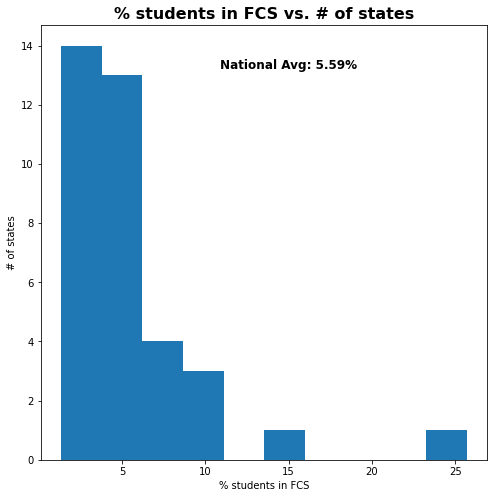

         StateName  TotalStudents Pct_InFCS ZScore_Pct_InFCS
40  South Carolina       251268.0     25.71             4.72
20        Maryland       276026.0     14.25             2.03
17        Kentucky       214321.0      9.97             1.02
44            Utah       300951.0      9.91             1.01
31      New Jersey       456376.0      9.05             0.81
2         Arkansas       179064.0      7.54             0.45
37          Oregon       204510.0      7.13             0.36
25     Mississippi       154010.0      6.45             0.20
45        Virginia       405826.0      6.32             0.17
43           Texas      1852808.0      6.03             0.10
19   Massachusetts       327732.0      5.84             0.06
15         Indiana       365052.0      5.83             0.05
1          Alabama       271109.0      5.52            -0.02
49   West Virginia        80954.0      5.39            -0.05
6      Connecticut       169269.0      5.29            -0.07
36        Oklahoma      

In [18]:
# % of students in FCS
drawBasicHistogram(df_fcs['Pct_InFCS'],"% students in FCS","# of states", "% students in FCS vs. # of states", float(df_natmean['Pct_InFCS']))
displayStatePerformance(['StateName','TotalStudents','Pct_InFCS','ZScore_Pct_InFCS'],"Pct_InFCS.csv", True)

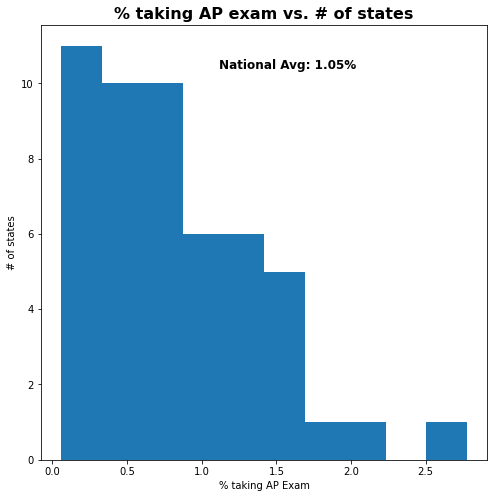

               StateName  TotalStudents Pct_InAP ZScore_Pct_InAP
20              Maryland       276026.0     2.78            3.38
31            New Jersey       456376.0     2.06            2.14
6            Connecticut       169269.0     1.92            1.90
7   District of Columbia        21147.0     1.66            1.45
19         Massachusetts       327732.0     1.66            1.45
9                Florida       988729.0     1.50            1.17
45              Virginia       405826.0     1.49            1.14
4             California      2175509.0     1.43            1.05
34              New York       954436.0     1.39            0.98
39          Rhode Island        44524.0     1.39            0.97
14              Illinois       620340.0     1.38            0.96
10               Georgia       556485.0     1.30            0.81
11                Hawaii        60893.0     1.28            0.79
27        North Carolina       534254.0     1.17            0.60
47            Washington 

In [19]:
# % of students in AP
drawBasicHistogram(df['Pct_InAP'],"% taking AP Exam","# of states", "% taking AP exam vs. # of states", float(df_natmean['Pct_InAP']))
displayStatePerformance(['StateName','TotalStudents','Pct_InAP','ZScore_Pct_InAP'],"Pct_InAP.csv", False)


# CAPE Optimization Metrics

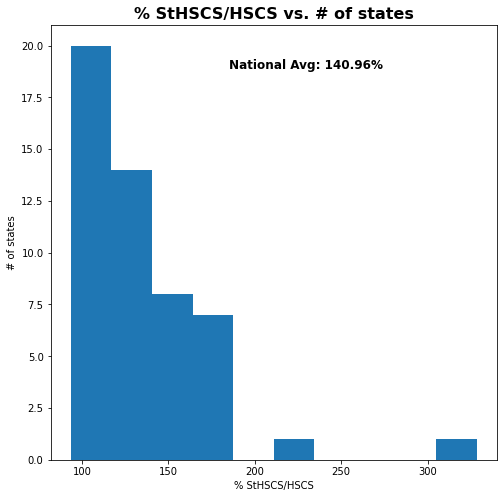

               StateName  TotalStudents CP_StHSCS_HSCS_All  \
23             Minnesota       314767.0             328.48   
3                Arizona       424108.0             213.05   
14              Illinois       620340.0             183.47   
8               Delaware        51457.0             180.02   
47            Washington       377376.0             178.72   
9                Florida       988729.0             176.53   
26               Montana        43789.0             176.35   
4             California      2175509.0             172.88   
41          South Dakota        44794.0             168.83   
28          North Dakota        37809.0             156.86   
22              Michigan       549563.0             155.37   
43                 Texas      1852808.0             152.49   
24              Missouri       284189.0             148.89   
29              Nebraska       105420.0             148.44   
32            New Mexico       116494.0             145.74   
13      

In [20]:
# % students in HS with FCS / % HS with FCS

drawBasicHistogram(df['CP_StHSCS_HSCS_All'],"% StHSCS/HSCS","# of states", "% StHSCS/HSCS vs. # of states", float(df_natmean['CP_StHSCS_HSCS_All']))
displayStatePerformance(['StateName','TotalStudents','CP_StHSCS_HSCS_All','ZScore_CP_StHSCS_HSCS_All'],'CP_StHSCS_HSCS_All.csv', False)

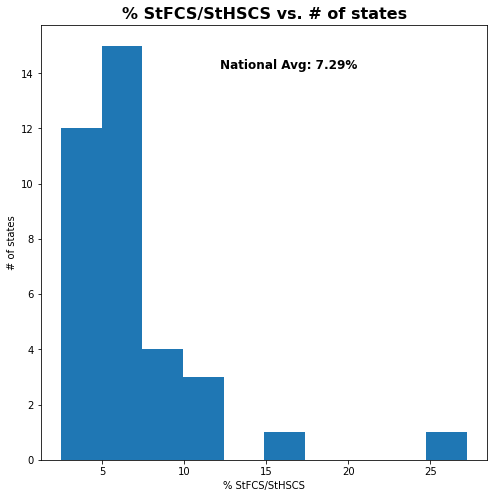

         StateName  TotalStudents CP_StFCS_StHSCS_All  \
40  South Carolina       251268.0               27.25   
20        Maryland       276026.0               15.11   
17        Kentucky       214321.0               12.26   
44            Utah       300951.0               11.58   
31      New Jersey       456376.0               10.48   
37          Oregon       204510.0                9.10   
2         Arkansas       179064.0                8.78   
25     Mississippi       154010.0                8.42   
43           Texas      1852808.0                8.34   
45        Virginia       405826.0                7.39   
15         Indiana       365052.0                7.13   
19   Massachusetts       327732.0                6.53   
1          Alabama       271109.0                6.34   
28    North Dakota        37809.0                6.29   
49   West Virginia        80954.0                6.26   
42       Tennessee       318053.0                6.21   
36        Oklahoma       198769

In [21]:
# # of students in FCS / # of student in HS with CS

drawBasicHistogram(df_fcs['CP_StFCS_StHSCS_All'],"% StFCS/StHSCS", "# of states", "% StFCS/StHSCS vs. # of states", float(df_natmean['CP_StFCS_StHSCS_All']))
displayStatePerformance(['StateName','TotalStudents','CP_StFCS_StHSCS_All','ZScore_CP_StFCS_StHSCS_All'],'CP_StFCS_StHSCS_All.csv', True)

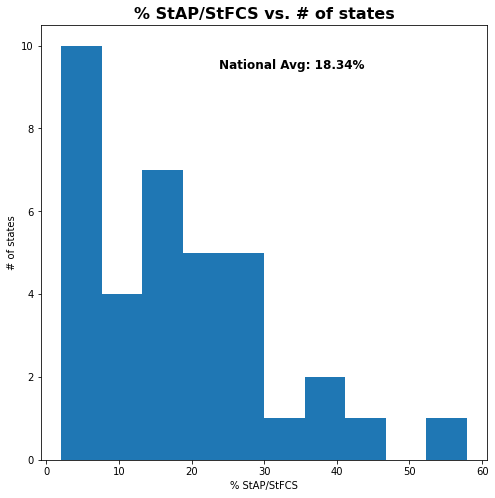

         StateName  TotalStudents CP_StAP_StFCS_All ZScore_CP_StAP_StFCS_All
9          Florida       988729.0             57.91                     3.19
34        New York       954436.0             41.26                     1.86
10         Georgia       556485.0             36.35                     1.47
6      Connecticut       169269.0             36.28                     1.46
11          Hawaii        60893.0             35.02                     1.36
33          Nevada       165574.0             29.04                     0.88
19   Massachusetts       327732.0             28.47                     0.83
47      Washington       377376.0             26.81                     0.70
18       Louisiana       250942.0             26.02                     0.64
13           Idaho       127590.0             24.86                     0.54
8         Delaware        51457.0             24.36                     0.50
45        Virginia       405826.0             23.53                     0.44

In [22]:
# # of students in AP / # of student in FCS

drawBasicHistogram(df_fcs['CP_StAP_StFCS_All'],"% StAP/StFCS", "# of states", "% StAP/StFCS vs. # of states", float(df_natmean['CP_StAP_StFCS_All']))
displayStatePerformance(['StateName','TotalStudents','CP_StAP_StFCS_All','ZScore_CP_StAP_StFCS_All'],'CP_StAP_StFCS_All.csv', True)

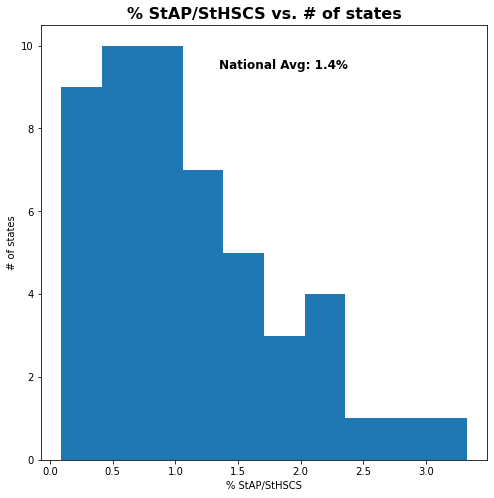

               StateName  TotalStudents CP_StAP_StHSCS_All  \
7   District of Columbia        21147.0               3.33   
20              Maryland       276026.0               2.94   
31            New Jersey       456376.0               2.38   
6            Connecticut       169269.0               2.16   
9                Florida       988729.0               2.14   
34              New York       954436.0               2.11   
4             California      2175509.0               2.06   
19         Massachusetts       327732.0               1.86   
45              Virginia       405826.0               1.74   
14              Illinois       620340.0               1.73   
10               Georgia       556485.0               1.59   
27        North Carolina       534254.0               1.54   
11                Hawaii        60893.0               1.51   
39          Rhode Island        44524.0               1.45   
8               Delaware        51457.0               1.40   
43      

In [23]:
# students taking AP exan / # students in HS with FCS

drawBasicHistogram(df['CP_StAP_StHSCS_All'],"% StAP/StHSCS", "# of states", "% StAP/StHSCS vs. # of states", float(df_natmean['CP_StAP_StHSCS_All']))
displayStatePerformance(['StateName','TotalStudents','CP_StAP_StHSCS_All','ZScore_CP_StAP_StHSCS_All'],'CP_StAP_StHSCS_All.csv', False)

# Female/Male Relative Strength Metrics

Because CSEd report deoes not report total male/female students or male/female students in HS with FCS, it is assumed that this is 51% for males/49% for females.   So RS_FemaleMale_CP_StHSCS_HSCS which is not reported is assumed to be 1.0 for all states. 

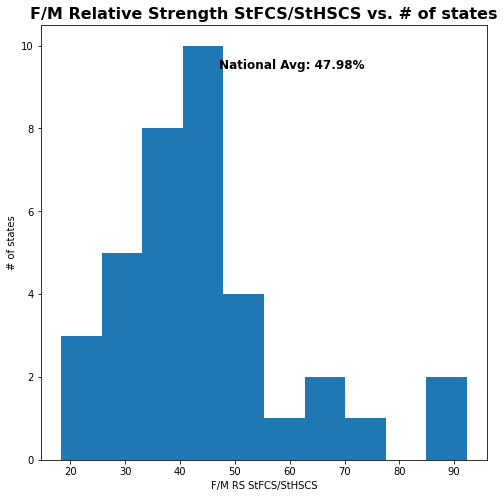

         StateName  TotalStudents RS_FemaleMaleEst_CP_StFCS_StHSCS  \
25     Mississippi       154010.0                            92.33   
40  South Carolina       251268.0                            91.90   
20        Maryland       276026.0                            76.75   
18       Louisiana       250942.0                            67.62   
1          Alabama       271109.0                            67.02   
36        Oklahoma       198769.0                            60.87   
49   West Virginia        80954.0                            54.02   
33          Nevada       165574.0                            52.70   
45        Virginia       405826.0                            49.89   
44            Utah       300951.0                            48.22   
34        New York       954436.0                            47.26   
31      New Jersey       456376.0                            46.59   
32      New Mexico       116494.0                            44.65   
2         Arkansas  

In [24]:
# Female/Male Relative Strength: Students in FCS / Student in HS with FCS 

drawBasicHistogram(df_fcs['RS_FemaleMaleEst_CP_StFCS_StHSCS'],"F/M RS StFCS/StHSCS", "# of states", "F/M Relative Strength StFCS/StHSCS vs. # of states", float(df_natmean['RS_MaleFemaleEst_CP_StFCS_StHSCS']))
displayStatePerformance(['StateName','TotalStudents','RS_FemaleMaleEst_CP_StFCS_StHSCS','ZScore_RS_FemaleMaleEst_CP_StFCS_StHSCS'],'RS_FemaleMaleEst_CP_StFCS_StHSCS.csv', True)

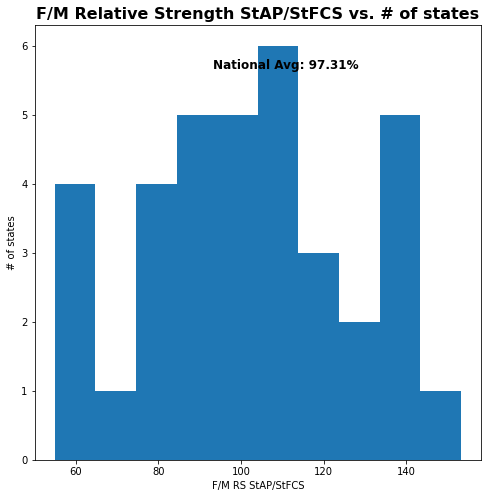

         StateName  TotalStudents RS_FemaleMale_CP_StAP_StFCS  \
29        Nebraska       105420.0                      153.22   
50         Wyoming        30490.0                      137.67   
11          Hawaii        60893.0                      137.18   
42       Tennessee       318053.0                      135.84   
47      Washington       377376.0                      134.82   
3          Arizona       424108.0                      133.62   
6      Connecticut       169269.0                      131.64   
12            Iowa       167016.0                      126.49   
34        New York       954436.0                      119.52   
43           Texas      1852808.0                      116.68   
17        Kentucky       214321.0                      114.87   
9          Florida       988729.0                      109.98   
33          Nevada       165574.0                      106.96   
13           Idaho       127590.0                      106.19   
19   Massachusetts       

In [25]:
# Female/Male Relative Strength: Students taking AP Exam / Student in FCS course 

drawBasicHistogram(df_fcs['RS_FemaleMale_CP_StAP_StFCS'],"F/M RS StAP/StFCS", "# of states", "F/M Relative Strength StAP/StFCS vs. # of states", float(df_natmean['RS_FemaleMale_CP_StAP_StFCS']))
displayStatePerformance(['StateName','TotalStudents','RS_FemaleMale_CP_StAP_StFCS','ZScore_RS_FemaleMale_CP_StAP_StFCS'],'RS_FemaleMale_CP_StAP_StFCS.csv', True)

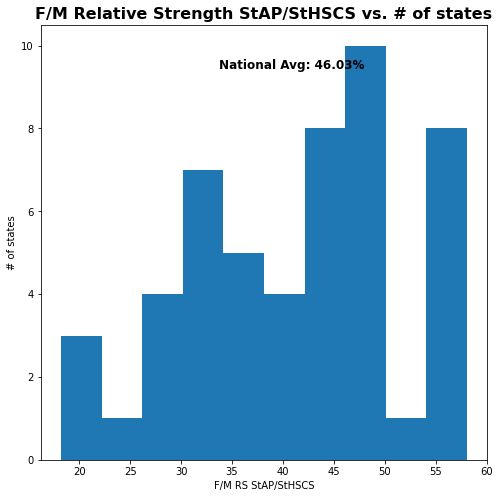

               StateName  TotalStudents RS_FemaleMaleEst_CP_StAP_StHSCS  \
1                Alabama       271109.0                           58.07   
7   District of Columbia        21147.0                           57.31   
20              Maryland       276026.0                           57.23   
42             Tennessee       318053.0                           56.86   
18             Louisiana       250942.0                           56.52   
34              New York       954436.0                           56.48   
33                Nevada       165574.0                           56.37   
40        South Carolina       251268.0                           55.16   
25           Mississippi       154010.0                           50.69   
47            Washington       377376.0                           48.59   
17              Kentucky       214321.0                           48.12   
14              Illinois       620340.0                           48.04   
49         West Virginia 

In [26]:
# Female/Male Relative Strength: Students taking AP Exam / Student in HS with FCS 

drawBasicHistogram(df['RS_FemaleMaleEst_CP_StAP_StHSCS'],"F/M RS StAP/StHSCS", "# of states", "F/M Relative Strength StAP/StHSCS vs. # of states", float(df_natmean['RS_FemaleMaleEst_CP_StAP_StHSCS']))
displayStatePerformance(['StateName','TotalStudents','RS_FemaleMaleEst_CP_StAP_StHSCS','ZScore_RS_FemaleMaleEst_CP_StAP_StHSCS'],'RS_FemaleMaleEst_CP_StAP_StHSCS.csv', False)

# Black/White Relative Strength Metrics

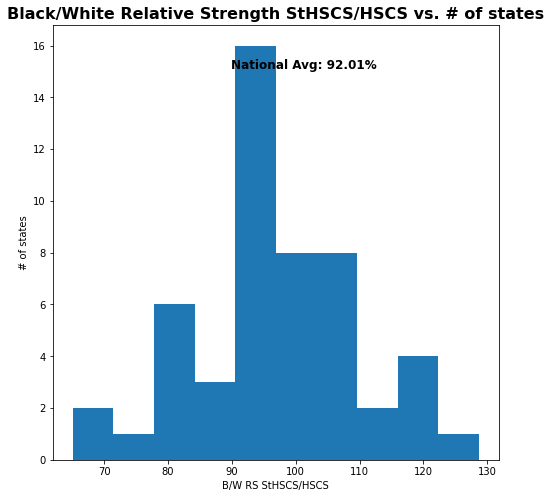

               StateName  TotalStudents RS_BlackWhite_CP_StHSCS_HSCS  \
29              Nebraska       105420.0                       128.64   
26               Montana        43789.0                       121.74   
28          North Dakota        37809.0                       120.13   
13                 Idaho       127590.0                       116.63   
16                Kansas       161625.0                       116.02   
21                 Maine        54104.0                       113.43   
46               Vermont        26141.0                       111.14   
41          South Dakota        44794.0                       109.34   
49         West Virginia        80954.0                       109.31   
18             Louisiana       250942.0                       109.31   
50               Wyoming        30490.0                       105.91   
43                 Texas      1852808.0                       105.26   
37                Oregon       204510.0                       10

In [27]:
df_fcs = df_fcs.loc[df_fcs['InFCS_White'].notnull()]

# Black/White Relative Strength: Student in HS with FCS / HS with FCS 

drawBasicHistogram(df['RS_BlackWhite_CP_StHSCS_HSCS'],"B/W RS StHSCS/HSCS", "# of states", "Black/White Relative Strength StHSCS/HSCS vs. # of states", float(df_natmean['RS_BlackWhite_CP_StHSCS_HSCS']))
displayStatePerformance(['StateName','TotalStudents','RS_BlackWhite_CP_StHSCS_HSCS','ZScore_RS_BlackWhite_CP_StHSCS_HSCS'],'RS_BlackWhite_CP_StHSCS_HSCS.csv', False)

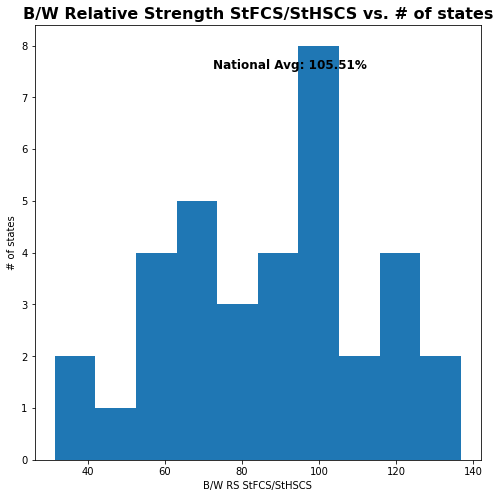

         StateName  TotalStudents RS_BlackWhite_CP_StFCS_StHSCS  \
18       Louisiana       250942.0                        136.82   
25     Mississippi       154010.0                        128.21   
42       Tennessee       318053.0                        124.79   
8         Delaware        51457.0                        118.63   
20        Maryland       276026.0                        116.90   
44            Utah       300951.0                        115.77   
3          Arizona       424108.0                        110.86   
1          Alabama       271109.0                        110.58   
10         Georgia       556485.0                        104.46   
15         Indiana       365052.0                        104.01   
17        Kentucky       214321.0                        103.42   
2         Arkansas       179064.0                        103.10   
48       Wisconsin       284064.0                        103.02   
40  South Carolina       251268.0                         99.9

In [28]:
# Black/White Relative Strength: Students in FCS / Student in HS with FCS 

drawBasicHistogram(df_fcs['RS_BlackWhite_CP_StFCS_StHSCS'],"B/W RS StFCS/StHSCS", "# of states", "B/W Relative Strength StFCS/StHSCS vs. # of states", float(df_natmean['RS_BlackWhite_CP_StFCS_StHSCS']))
displayStatePerformance(['StateName','TotalStudents','RS_BlackWhite_CP_StFCS_StHSCS','ZScore_RS_BlackWhite_CP_StFCS_StHSCS'],'RS_BlackWhite_CP_StFCS_StHSCS.csv', True)


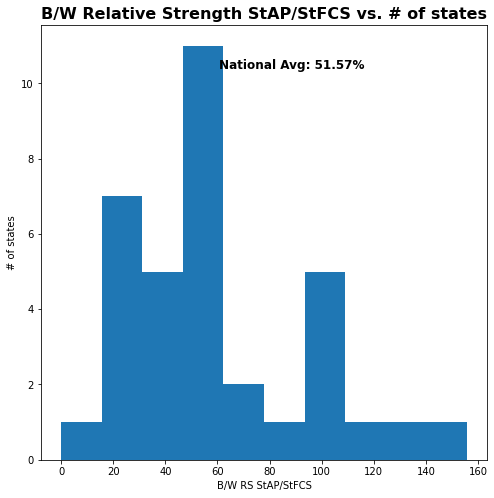

         StateName  TotalStudents RS_BlackWhite_CP_StAP_StFCS  \
12            Iowa       167016.0                      155.77   
13           Idaho       127590.0                      139.91   
49   West Virginia        80954.0                      115.17   
32      New Mexico       116494.0                      105.56   
42       Tennessee       318053.0                       98.16   
37          Oregon       204510.0                       95.43   
29        Nebraska       105420.0                       94.85   
34        New York       954436.0                       94.04   
19   Massachusetts       327732.0                       80.41   
9          Florida       988729.0                       63.26   
16          Kansas       161625.0                       63.14   
24        Missouri       284189.0                       59.87   
36        Oklahoma       198769.0                       59.30   
44            Utah       300951.0                       58.25   
48       Wisconsin       

In [29]:
# Black/White Relative Strength: Students taking AP Exam / Student in FCS course 

drawBasicHistogram(df_fcs['RS_BlackWhite_CP_StAP_StFCS'],"B/W RS StAP/StFCS", "# of states", "B/W Relative Strength StAP/StFCS vs. # of states", float(df_natmean['RS_BlackWhite_CP_StAP_StFCS']))
displayStatePerformance(['StateName','TotalStudents','RS_BlackWhite_CP_StAP_StFCS','ZScore_RS_BlackWhite_CP_StAP_StFCS'],'RS_BlackWhite_CP_StAP_StFCS.csv', True)

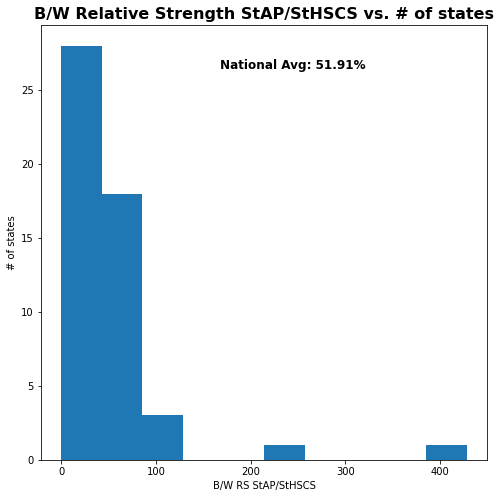

               StateName  TotalStudents RS_BlackWhite_CP_StAP_StHSCS  \
41          South Dakota        44794.0                       428.44   
26               Montana        43789.0                       222.68   
42             Tennessee       318053.0                       122.50   
12                  Iowa       167016.0                        99.33   
34              New York       954436.0                        91.29   
37                Oregon       204510.0                        77.16   
19         Massachusetts       327732.0                        73.16   
44                  Utah       300951.0                        67.43   
39          Rhode Island        44524.0                        64.51   
35                  Ohio       586765.0                        61.82   
32            New Mexico       116494.0                        61.26   
8               Delaware        51457.0                        58.81   
13                 Idaho       127590.0                        5

In [30]:
# Black/White Relative Strength: Students taking AP / Student in HS with FCS

drawBasicHistogram(df['RS_BlackWhite_CP_StAP_StHSCS'],"B/W RS StAP/StHSCS", "# of states", "B/W Relative Strength StAP/StHSCS vs. # of states", float(df_natmean['RS_BlackWhite_CP_StAP_StHSCS']))
displayStatePerformance(['StateName','TotalStudents','RS_BlackWhite_CP_StAP_StHSCS','ZScore_RS_BlackWhite_CP_StAP_StHSCS'],'RS_BlackWhite_CP_StAP_StHSCS.csv', False)

# HLLL/White Relative Strength Metrics (Hispanic/LatinX)

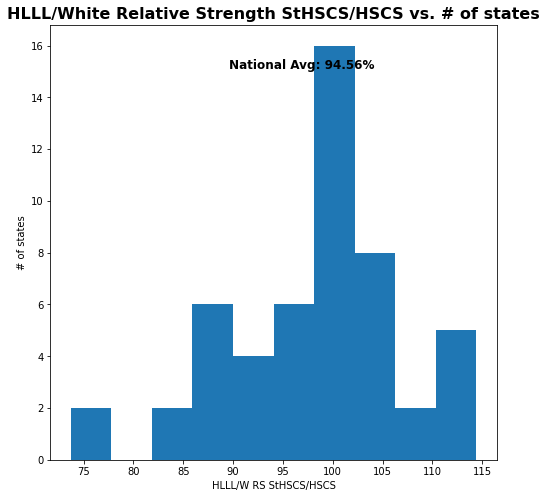

               StateName  TotalStudents RS_HLLLWhite_CP_StHSCS_HSCS  \
29              Nebraska       105420.0                      114.42   
14              Illinois       620340.0                      111.95   
49         West Virginia        80954.0                      111.54   
26               Montana        43789.0                      111.14   
16                Kansas       161625.0                      110.62   
41          South Dakota        44794.0                      108.49   
1                Alabama       271109.0                      106.37   
46               Vermont        26141.0                      105.66   
45              Virginia       405826.0                      104.48   
25           Mississippi       154010.0                      103.85   
18             Louisiana       250942.0                      103.17   
11                Hawaii        60893.0                      103.07   
33                Nevada       165574.0                      102.65   
21    

In [31]:
# Hispanic-LatinX/White Relative Strength: Student in HS with FCS / HS with FCS 

drawBasicHistogram(df['RS_HLLLWhite_CP_StHSCS_HSCS'],"HLLL/W RS StHSCS/HSCS", "# of states", "HLLL/White Relative Strength StHSCS/HSCS vs. # of states", float(df_natmean['RS_HLLLWhite_CP_StHSCS_HSCS']))
displayStatePerformance(['StateName','TotalStudents','RS_HLLLWhite_CP_StHSCS_HSCS','ZScore_RS_HLLLWhite_CP_StHSCS_HSCS'],'RS_HLLLWhite_CP_StHSCS_HSCS.csv', False)

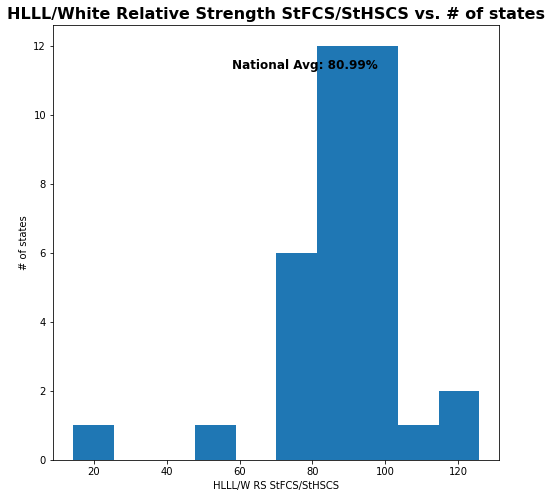

         StateName  TotalStudents RS_HLLLWhite_CP_StFCS_StHSCS  \
44            Utah       300951.0                       125.77   
1          Alabama       271109.0                       119.68   
25     Mississippi       154010.0                       113.99   
13           Idaho       127590.0                        99.87   
17        Kentucky       214321.0                        99.25   
46         Vermont        26141.0                        99.03   
40  South Carolina       251268.0                        98.75   
15         Indiana       365052.0                        98.62   
11          Hawaii        60893.0                        97.48   
3          Arizona       424108.0                        97.24   
18       Louisiana       250942.0                        96.99   
33          Nevada       165574.0                        95.63   
48       Wisconsin       284064.0                        94.68   
8         Delaware        51457.0                        94.17   
42       T

In [32]:
# Hispanic-LatinX/White Relative Strength: Students in FCS / Student in HS with FCS 

drawBasicHistogram(df_fcs['RS_HLLLWhite_CP_StFCS_StHSCS'],"HLLL/W RS StFCS/StHSCS", "# of states", "HLLL/White Relative Strength StFCS/StHSCS vs. # of states", float(df_natmean['RS_HLLLWhite_CP_StFCS_StHSCS']))
displayStatePerformance(['StateName','TotalStudents','RS_HLLLWhite_CP_StFCS_StHSCS','ZScore_RS_HLLLWhite_CP_StFCS_StHSCS'],'RS_HLLLWhite_CP_StFCS_StHSCS.csv', True)

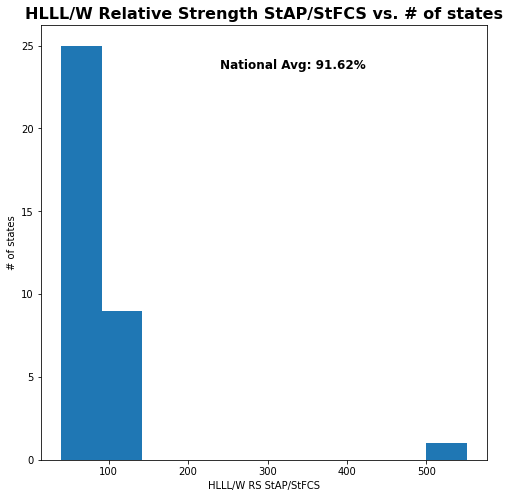

         StateName  TotalStudents RS_HLLLWhite_CP_StAP_StFCS  \
49   West Virginia        80954.0                     551.18   
42       Tennessee       318053.0                     137.27   
36        Oklahoma       198769.0                     123.96   
18       Louisiana       250942.0                     111.34   
34        New York       954436.0                     109.60   
24        Missouri       284189.0                     105.75   
9          Florida       988729.0                     102.25   
11          Hawaii        60893.0                      96.94   
25     Mississippi       154010.0                      96.82   
16          Kansas       161625.0                      96.04   
2         Arkansas       179064.0                      89.70   
12            Iowa       167016.0                      85.42   
31      New Jersey       456376.0                      80.50   
15         Indiana       365052.0                      77.79   
45        Virginia       405826.0       

In [33]:
# Hispanic-LatinX/White Relative Strength: Students taking AP Exam / Student in FCS course 

drawBasicHistogram(df_fcs['RS_HLLLWhite_CP_StAP_StFCS'],"HLLL/W RS StAP/StFCS", "# of states", "HLLL/W Relative Strength StAP/StFCS vs. # of states", float(df_natmean['RS_HLLLWhite_CP_StAP_StFCS']))
displayStatePerformance(['StateName','TotalStudents','RS_HLLLWhite_CP_StAP_StFCS','ZScore_RS_HLLLWhite_CP_StAP_StFCS'],'RS_HLLLWhite_CP_StAP_StFCS.csv', True)


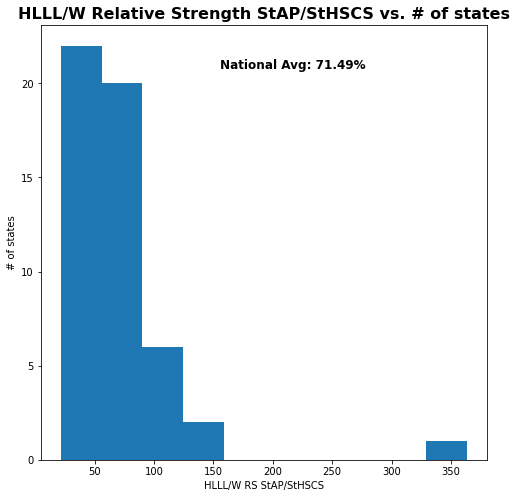

               StateName  TotalStudents RS_HLLLWhite_CP_StAP_StHSCS  \
21                 Maine        54104.0                      363.58   
28          North Dakota        37809.0                      136.88   
42             Tennessee       318053.0                      127.88   
35                  Ohio       586765.0                      110.47   
25           Mississippi       154010.0                      110.37   
18             Louisiana       250942.0                      107.99   
36              Oklahoma       198769.0                      105.81   
11                Hawaii        60893.0                       94.49   
24              Missouri       284189.0                       91.63   
9                Florida       988729.0                       86.25   
34              New York       954436.0                       85.91   
26               Montana        43789.0                       84.57   
14              Illinois       620340.0                       80.38   
16    

In [34]:
# Hispanic-LatinX/White Relative Strength: Students taking AP / Student in HS with FCS

drawBasicHistogram(df['RS_HLLLWhite_CP_StAP_StHSCS'],"HLLL/W RS StAP/StHSCS", "# of states", "HLLL/W Relative Strength StAP/StHSCS vs. # of states", float(df_natmean['RS_HLLLWhite_CP_StAP_StHSCS']))
displayStatePerformance(['StateName','TotalStudents','RS_HLLLWhite_CP_StAP_StHSCS','ZScore_RS_HLLLWhite_CP_StAP_StHSCS'],'RS_HLLLWhite_CP_StAP_StHSCS.csv', False)

In [35]:
key_metrics = ['PctHSwFCS','PctStudentsHSwCS','Pct_InFCS','Pct_InAP',
               'CP_StHSCS_HSCS_All','CP_StFCS_StHSCS_All','CP_StAP_StFCS_All','CP_StAP_StHSCS_All',
               'RS_FemaleMaleEst_CP_StFCS_StHSCS','RS_FemaleMale_CP_StAP_StFCS','RS_FemaleMaleEst_CP_StAP_StHSCS',
               'RS_BlackWhite_CP_StHSCS_HSCS','RS_BlackWhite_CP_StFCS_StHSCS','RS_BlackWhite_CP_StAP_StFCS','RS_BlackWhite_CP_StAP_StHSCS',
               'RS_HLLLWhite_CP_StHSCS_HSCS','RS_HLLLWhite_CP_StFCS_StHSCS','RS_HLLLWhite_CP_StAP_StFCS','RS_HLLLWhite_CP_StAP_StHSCS']

key_metrics_zscore = []
for km in key_metrics:
    key_metrics_zscore.append("ZScore_" + km)
    
key_metrics = ['StateName', 'TotalStudents'] + key_metrics
key_metrics_zscore = ['StateName', 'TotalStudents'] + key_metrics_zscore

df[key_metrics].to_csv(FILEROOT + "key_metrics.csv")
df[key_metrics_zscore].to_csv(FILEROOT + "key_metrics_zscore.csv")

